# Piezómetros AG

In [1]:
from collections import OrderedDict
import getpass
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from os.path import join
import psycopg2
import pandas as pd
import pandas.io.sql as psql
import ipywidgets as widgets

%matplotlib widget

import sys
sys.path.append(r'C:\Users\solis\Documents\DEV\python3\common')
import plot_with_mpl as p

## Figure parameters

In [2]:
# figure size
x_cm = 11
x_in, y_in = p.fig_size_cm_2_in(x_cm)
print(x_in, y_in)

4.330708661417323 3.248031496062992


In [3]:
mpl.rcdefaults()
plt.rc('figure', figsize=(x_in, y_in), dpi=80)
plt.rc('font', size=8)
plt.rc('axes', labelsize=8, titlesize= 9, grid=True)
plt.rc('axes.spines', right=False, top=False)
plt.rc('xtick', direction='out', top=False)
plt.rc('ytick', direction='out', right=False)
plt.rc('lines', linewidth=0.8, linestyle='-', marker='.', markersize=4)
plt.rc('legend', fontsize=8, framealpha=0.5, loc='best')

plt.subplots_adjust(hspace=0.1, bottom=0.16, top=0.87)
plt.close()

## Database

In [4]:
db = getpass.getpass('DB: ')
user = getpass.getpass('User: ')
passw = getpass.getpass('Password: ')
con = psycopg2.connect(database=db, user=user, password=passw)

DB:  ···
User:  ········
Password:  ··


## Functions

In [5]:
def cnp_get(cods):
    """
    cods : [str]
    """
    select = \
    """
    select t2.cod, t2.fecha::date, t1.z-t2.pnp cnp, t2.pnp, t2.situacion 
    from ipas.ipa1 t1
        join ipas.ipa2 t2 using(cod)
    where t1.cod = %s and t2.situacion not in ('n', 'd')
    order by t2.fecha
    """
    od_pzs = [[pz1,[]] for pz1 in cods]
    od_pzs = OrderedDict(od_pzs)
    for k in od_pzs:
        od_pzs[k] = psql.read_sql(select, con, params=(k,))
        if len(od_pzs[k]) == 0:
            raise ValueError(f'el piezómetro {k} no tiene datos')
    return od_pzs

## Evoluciones piezométricas

### Piezometros del acuífero para ver uno a uno

In [6]:
select = \
"""
select t2.cod, min(t2.fecha)::date, extract('year' from min(t2.fecha)) min_year, 
    max(t2.fecha)::date, extract('year' from max(t2.fecha)) max_year, count(*)
from ipas.ipa1 t1 join ipas.ipa2 t2 using(cod)
where t1.acuifero = '096'
group by t2.cod
having count(*) >= 20
order by t2.cod
"""
piezos = psql.read_sql(select, con)
piezos_cod = piezos['cod'].to_numpy()
d_pzs = cnp_get(piezos_cod)

piez1 = widgets.Select(
    options=piezos_cod,
    value=piezos_cod[0],
    # rows=10,
    description='Piezómetros en el AG:',
    disabled=False
)
display(piez1)

Select(description='Piezómetros en el AG:', options=('253910001', '253920008', '253920011', '253920019', '2539…

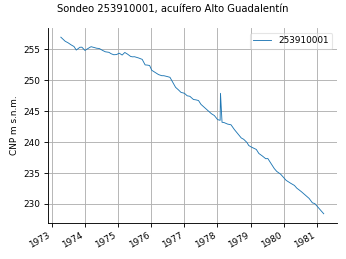

In [8]:
p.subplot_nv([d_pzs[piez1.value]['fecha'], ], [d_pzs[piez1.value]['cnp'], ], [f'{piez1.value}', ],
            f'Sondeo {piez1.value}, acuífero Alto Guadalentín', ['CNP m s.n.m.', ], plot=[True, ])

### Grupos de piezómetros Puente Pasico (Hospital Rafael Méndez)

In [41]:
# Run only if I edit C:\\Users\\solis\\Documents\\DEV\\python3\\common\\plot_with_mpl.py
from importlib import reload
import plot_with_mpl
reload(plot_with_mpl)
import plot_with_mpl as p

In [9]:
pzs_hospital = ['253920008', '253920011', '253920051', '253920102']
d_pzs_hospital = cnp_get(pzs_hospital)
len(d_pzs_hospital)

4

In [29]:
d_pzs_hospital['253920052'].head()

,cod,fecha,cnp,pnp,situacion
0,253920052,1972-07-04,256.680001,53.30,e
1,253920052,1973-01-13,259.099999,50.88,e
2,253920052,1973-01-17,259.099999,50.88,ep
3,253920052,1973-04-11,256.320000,53.66,e
4,253920052,1973-05-29,255.380002,54.60,e


In [42]:
from inspect import signature
print('subplot_nv', signature(p.subplot_nv))
print('subplot_1graph', signature(p.subplot_1graph))

subplot_nv (x, y, legends, title, ylabels, plot=[], hspace=0.1, close_plt=True, fout=None)
subplot_1graph (x, y, legends, title, ylabel, close_plt=True, fout=None)


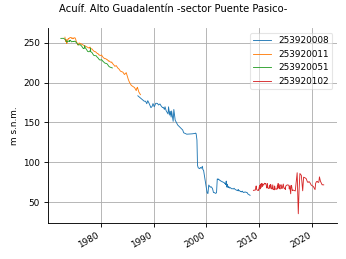

In [65]:
my_pzs = d_pzs_hospital
dir_out = r'H:\LSGB\20220422_red_cuantitativa_dhs\poster\datos\pzxy'

fechas = [my_pzs[k]['fecha'] for k in my_pzs]
cnp = [my_pzs[k]['cnp'] for k in my_pzs]
legends = [k for k in my_pzs]
labels = ['m s.n.m.' for i in range(len(legends))]
plot = [True for i in range(len(legends))]                                        
title = 'Acuíf. Alto Guadalentín -sector Puente Pasico-'

#p.subplot_nv(fechas, cnp, legends, 'Acuíf. Alto Guadalentín -sector R. Méndez', labels, plot=plot)
p.subplot_1graph (fechas, cnp, legends, title, 'm s.n.m.')

### Grupo Pulgara

In [10]:
pzs_pulgara = ['253930055', '253930094', '253930118', '253930121']
d_pzs_pulgara = cnp_get(pzs_pulgara)
len(d_pzs_pulgara)

4

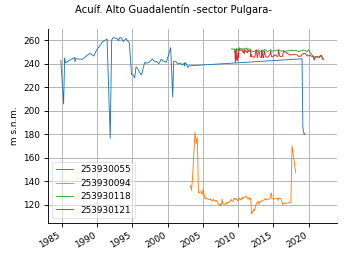

In [67]:
my_pzs = d_pzs_pulgara
dir_out = r'H:\LSGB\20220422_red_cuantitativa_dhs\poster\datos\pzxy'

fechas = [my_pzs[k]['fecha'] for k in my_pzs]
cnp = [my_pzs[k]['cnp'] for k in my_pzs]
legends = [k for k in my_pzs]
label = 'm s.n.m.'                                  
title = 'Acuíf. Alto Guadalentín -sector Pulgara-'

p.subplot_1graph (fechas, cnp, legends, title, 'm s.n.m.')

### Grupo Los Turbintos

In [11]:
pzs_los_turbintos = ['253930012', '253930059', '253930119']
d_pzs_los_turbintos = cnp_get(pzs_los_turbintos)
len(d_pzs_los_turbintos)

3

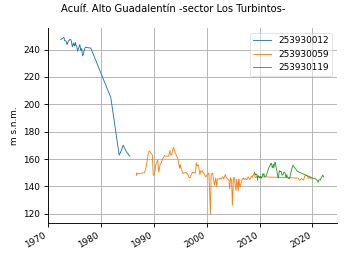

In [56]:
my_pzs = d_pzs_los_turbintos
dir_out = r'H:\LSGB\20220422_red_cuantitativa_dhs\poster\datos\pzxy'

fechas = [my_pzs[k]['fecha'] for k in my_pzs]
cnp = [my_pzs[k]['cnp'] for k in my_pzs]
legends = [k for k in my_pzs]
label = 'm s.n.m.'                                  
title = 'Acuíf. Alto Guadalentín -sector Los Turbintos-'

p.subplot_1graph (fechas, cnp, legends, title, 'm s.n.m.')

### Grupo Estación del Puerto N

In [12]:
pzs_est_puerto_n = ['253920019', '253920041', '253920043', '253920051', '253960051']
d_pzs_est_puerto_n = cnp_get(pzs_est_puerto_n)
len(d_pzs_est_puerto_n)

5

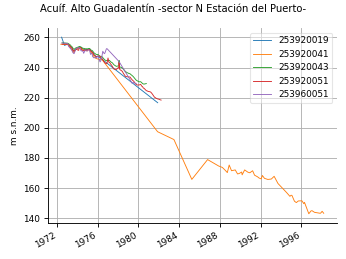

In [58]:
my_pzs = d_pzs_est_puerto_n
dir_out = r'H:\LSGB\20220422_red_cuantitativa_dhs\poster\datos\pzxy'

fechas = [my_pzs[k]['fecha'] for k in my_pzs]
cnp = [my_pzs[k]['cnp'] for k in my_pzs]
legends = [k for k in my_pzs]
label = 'm s.n.m.'                                  
title = 'Acuíf. Alto Guadalentín -sector N Estación del Puerto-'

p.subplot_1graph (fechas, cnp, legends, title, 'm s.n.m.')

### Grupo Los Francos

In [13]:
pzs_los_francos = ['253920062', '253920105']
d_pzs_los_francos = cnp_get(pzs_los_francos)
len(d_pzs_los_francos)

2

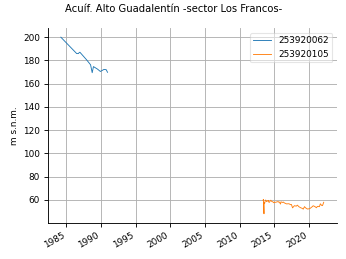

In [61]:
my_pzs = d_pzs_los_francos
dir_out = r'H:\LSGB\20220422_red_cuantitativa_dhs\poster\datos\pzxy'

fechas = [my_pzs[k]['fecha'] for k in my_pzs]
cnp = [my_pzs[k]['cnp'] for k in my_pzs]
legends = [k for k in my_pzs]
label = 'm s.n.m.'                                  
title = 'Acuíf. Alto Guadalentín -sector Los Francos-'

p.subplot_1graph (fechas, cnp, legends, title, 'm s.n.m.')

### Grupo El Parador (La Escarihuela)

In [14]:
pzs_la_escarihuela = ['253960072', '253960113']
d_pzs_la_escarihuela = cnp_get(pzs_la_escarihuela)
len(d_pzs_la_escarihuela)

2

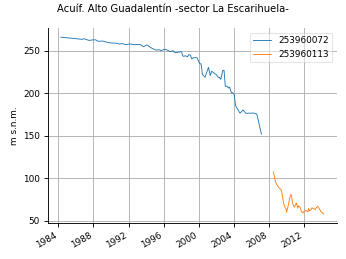

In [63]:
my_pzs = d_pzs_la_escarihuela
dir_out = r'H:\LSGB\20220422_red_cuantitativa_dhs\poster\datos\pzxy'

fechas = [my_pzs[k]['fecha'] for k in my_pzs]
cnp = [my_pzs[k]['cnp'] for k in my_pzs]
legends = [k for k in my_pzs]
label = 'm s.n.m.'                                  
title = 'Acuíf. Alto Guadalentín -sector La Escarihuela-'

p.subplot_1graph (fechas, cnp, legends, title, 'm s.n.m.')

### Figura compuesta

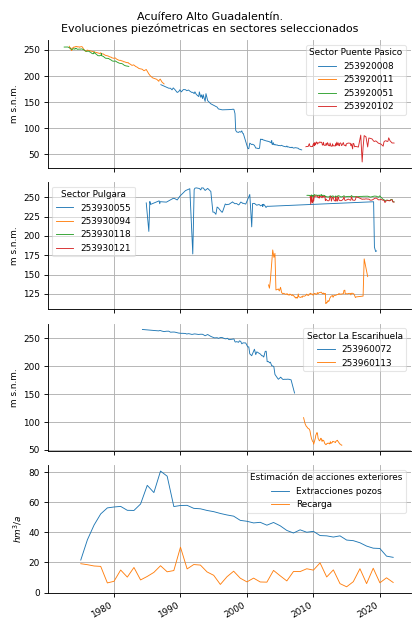

In [29]:
from datetime import date 

x2_in = 13.34 / 2.54
y2_in = 20 / 2.54

plt.close()
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(x2_in, y2_in))
fig.autofmt_xdate()
fig.suptitle('Acuífero Alto Guadalentín.\nEvoluciones piezómetricas en sectores seleccionados', fontsize=10)

my_pzs = d_pzs_hospital
fechas = [my_pzs[k]['fecha'] for k in my_pzs]
cnp = [my_pzs[k]['cnp'] for k in my_pzs]
legends = [k for k in my_pzs]
title_legend = 'Sector Puente Pasico'
ylabel = 'm s.n.m.'
for i in range(len(fechas)):
    axs[0].plot(fechas[i], cnp[i], marker=' ', label=legends[i])
axs[0].legend(title=title_legend)
axs[0].set(ylabel=ylabel)
#plt.tight_layout()

my_pzs = d_pzs_pulgara
fechas = [my_pzs[k]['fecha'] for k in my_pzs]
cnp = [my_pzs[k]['cnp'] for k in my_pzs]
legends = [k for k in my_pzs]
title_legend = 'Sector Pulgara'
ylabel = 'm s.n.m.'
for i in range(len(fechas)):
    axs[1].plot(fechas[i], cnp[i], marker=' ', label=legends[i])
axs[1].legend(title=title_legend)
axs[1].set(ylabel=ylabel)
#plt.tight_layout()

my_pzs = d_pzs_la_escarihuela
fechas = [my_pzs[k]['fecha'] for k in my_pzs]
cnp = [my_pzs[k]['cnp'] for k in my_pzs]
legends = [k for k in my_pzs]
title_legend = 'Sector La Escarihuela'
ylabel = 'm s.n.m.'
for i in range(len(fechas)):
    axs[2].plot(fechas[i], cnp[i], marker=' ', label=legends[i])
axs[2].legend(title=title_legend)
axs[2].set(ylabel=ylabel)
#plt.tight_layout()


fechas = [date(y1, 12, 31) for y1 in range(1974, 2022, 1)]
bombeos = [2.16e+01, 3.51e+01, 4.49e+01, 5.23e+01, 5.63e+01, 5.69e+01, 5.73e+01, 5.47e+01, 5.46e+01, 5.89e+01, 7.13e+01, 6.65e+01, 8.08e+01, 7.74e+01, 5.72e+01, 5.79e+01, 5.80e+01, 5.60e+01, 5.57e+01, 5.46e+01, 5.38e+01, 5.26e+01, 5.16e+01, 5.08e+01, 4.80e+01, 4.74e+01, 4.63e+01, 4.67e+01, 4.48e+01, 4.66e+01, 4.44e+01, 4.13e+01, 3.96e+01, 4.17e+01, 4.01e+01, 4.07e+01, 3.79e+01, 3.77e+01, 3.69e+01, 3.77e+01, 3.49e+01, 3.45e+01, 3.31e+01, 3.09e+01, 2.95e+01, 2.93e+01, 2.42e+01, 2.34e+01]
recarga = [19.1591281888321, 18.5122765940323, 17.6498078009659, 17.3725856889089, 6.38124232012817, 7.45932831146117, 14.9648603082652, 10.2520844032952, 16.6564285660948, 8.36800078987041, 10.6935862854602, 13.3939350066085, 17.8243550567056, 13.7840994606148, 14.6106320539701, 30.1607390432446, 15.7041192737507, 18.6149514503498, 18.2504557104229, 13.6968258327449, 11.4482464793933, 5.3698949854015, 10.5036378012729, 14.174263914621, 9.51282543780973, 7.07087510506023, 9.56929660878432, 7.00755894366448, 6.89461660171531, 14.7030394246557, 11.1094194535457, 7.71601545225474, 13.9689142019861, 13.9227105166433, 15.8067941300681, 14.892987908843, 19.7212730271701, 10.3359355359545, 15.0500804390086, 5.89867049543626, 3.80270331488366, 7.19237368503586, 15.8273291013316, 5.91407172388387, 16.1507548987315, 6.46338220518211, 9.78491380705092, 6.67797265488554]
title_legend = 'Estimación de acciones exteriores'
ylabel = '$ hm^3 / a $'
axs[3].plot(fechas, bombeos, marker=' ', label='Extracciones pozos')
axs[3].plot(fechas, recarga, marker=' ', label='Recarga')
axs[3].legend(title=title_legend)
axs[3].set(ylabel=ylabel)

plt.tight_layout()

In [77]:
from datetime import date 
days = [date(y1, 12, 31) for y1 in range(1977, 2022, 1)]
bombeos = [5.23e+01, 5.63e+01, 5.69e+01, 5.73e+01, 5.47e+01, 5.46e+01, 5.89e+01, 
           7.13e+01, 6.65e+01, 8.08e+01, 7.74e+01, 5.72e+01, 5.79e+01, 5.80e+01, 
           5.60e+01, 5.57e+01, 5.46e+01, 5.38e+01, 5.26e+01, 5.16e+01, 5.08e+01, 
           4.80e+01, 4.74e+01, 4.63e+01, 4.67e+01, 4.48e+01, 4.66e+01, 4.44e+01, 
           4.13e+01, 3.96e+01, 4.17e+01, 4.01e+01, 4.07e+01, 3.79e+01, 3.77e+01, 
           3.69e+01, 3.77e+01, 3.49e+01, 3.45e+01, 3.31e+01, 3.09e+01, 2.95e+01, 
           2.93e+01, 2.42e+01, 2.34e+01]
bombeos[-1]

23.4